In [183]:
# Simulate aircraft operation and ground handling
# Objective:  Simulate time for arrival aircraft, time needed for ground handling, ensure the time different 
#             between arrival and departure enough to ready to turnaround, and time for departure aircraft. 
#             Sorted aircraft following their soonest arrive time. Then, assigned gate for arrival aircraft.
#             Calculate the time for ground handling based on baggage handling, fueling, maintenance as task outside of aircraft.
#`            Calculate the time for ground handling based on catering, cleaning, toilet service as task inside of aircraft.
#             Take the biggest time between inside and outside task as the time for ground handling since tasks can be finished
#             the same time.
#             Generate delay disruption if something happens during ground handling, take 10% as probability.

# References:
# Szabo, S., Pilát, M., Makó, S., Korba, P., Čičváková, M., & Kmec, Ľ. (2021, December 21). 
# Increasing the efficiency of aircraft ground handling-A case study. MDPI. 
# https://www.mdpi.com/2226-4310/9/1/2 
# Gładyś, S., Kwasiborska, A., & Postół, J. (2022). 
# Determination of the impact of disruptions in ground handling on aircraft fuel consumption. Transport Problems, 17, Article 2. 
# https://doi.org/10.20858/tp.2022.17.2.10

In [184]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import heapq
import random

In [185]:
# Define ground handling tasks and time taken for each task in minutes
task_out = ['Baggage Handling', 'Fueling', 'Maintenance']
task_in = ['Catering', 'Cleaning', 'Toilet Service']
task_out_time = [(20, 40), (10, 15), (10, 15)]
task_in_time = [(15, 25), (15, 35), (10, 20)]

# Define the number of aircrafts, the time taken to arrive and depart, and time difference between arrival and departure
num_aircrafts = random.randint(10, 15)
arrival_times = [random.randint(1, 360) for _ in range(num_aircrafts)]
departure_times = [random.randint(arrival + 120, arrival + 360) for arrival in arrival_times]

for i, (arrival_time, departure_time) in enumerate(zip(arrival_times, departure_times)):
    time_diff = departure_time - arrival_time
    print(f'Aircraft {i + 1} arrival in {arrival_time} minutes')
    print(f'Aircraft {i + 1} departure in {departure_time} minutes')
    print(f'Time Difference: {time_diff} minutes')
    print('')

Aircraft 1 arrival in 113 minutes
Aircraft 1 departure in 244 minutes
Time Difference: 131 minutes

Aircraft 2 arrival in 36 minutes
Aircraft 2 departure in 224 minutes
Time Difference: 188 minutes

Aircraft 3 arrival in 296 minutes
Aircraft 3 departure in 588 minutes
Time Difference: 292 minutes

Aircraft 4 arrival in 38 minutes
Aircraft 4 departure in 205 minutes
Time Difference: 167 minutes

Aircraft 5 arrival in 124 minutes
Aircraft 5 departure in 387 minutes
Time Difference: 263 minutes

Aircraft 6 arrival in 120 minutes
Aircraft 6 departure in 394 minutes
Time Difference: 274 minutes

Aircraft 7 arrival in 84 minutes
Aircraft 7 departure in 241 minutes
Time Difference: 157 minutes

Aircraft 8 arrival in 118 minutes
Aircraft 8 departure in 426 minutes
Time Difference: 308 minutes

Aircraft 9 arrival in 215 minutes
Aircraft 9 departure in 543 minutes
Time Difference: 328 minutes

Aircraft 10 arrival in 346 minutes
Aircraft 10 departure in 557 minutes
Time Difference: 211 minutes

A

In [186]:
#Define the simulation ground handling time for each aircraft
def ground_handling_simulation(num_aircrafts, task_out, task_in, task_out_time, task_in_time):
    aircrafts = []
    for i in range(num_aircrafts):
        aircraft = {'Aircraft': i + 1}
        for j in range(len(task_out)):
            task = task_out[j]
            task_duration = random.randint(task_out_time[j][0], task_out_time[j][1])
            aircraft[task] = task_duration
        for j in range(len(task_in)):
            task = task_in[j]
            task_duration = random.randint(task_in_time[j][0], task_in_time[j][1])
            aircraft[task] = task_duration
        aircrafts.append(aircraft)
    return aircrafts

#Defind the total time taken for each aircraft to complete all ground handling tasks
def total_time_per_aircraft(aircrafts, task_out, task_in):
    total_times = {}
    for aircraft in aircrafts:
        aircraft_id = aircraft['Aircraft']
        total_time_out = sum(aircraft[task] for task in task_out)
        total_time_in = sum(aircraft[task] for task in task_in)
        total_times[aircraft_id] = max(total_time_out, total_time_in)
    return total_times

aircrafts = ground_handling_simulation(num_aircrafts, task_out, task_in, task_out_time, task_in_time)
total_times = total_time_per_aircraft(aircrafts, task_out, task_in)

for aircraft_id, total_time in total_times.items():
    print(f'Aircraft {aircraft_id} is ready in {total_time} minutes')


Aircraft 1 is ready in 66 minutes
Aircraft 2 is ready in 61 minutes
Aircraft 3 is ready in 65 minutes
Aircraft 4 is ready in 68 minutes
Aircraft 5 is ready in 53 minutes
Aircraft 6 is ready in 51 minutes
Aircraft 7 is ready in 74 minutes
Aircraft 8 is ready in 73 minutes
Aircraft 9 is ready in 72 minutes
Aircraft 10 is ready in 68 minutes
Aircraft 11 is ready in 57 minutes


In [187]:
#Defind random disruption in ground handling tasks
def random_disruption(aircrafts, task_out, task_in):
    disruption_time = 0
    for aircraft in aircrafts:
        for task in task_out + task_in:
            if random.random() < 0.1:
                disruption_time = random.randint(5, 30)
                aircraft[task] += disruption_time
                # print(f'Aircraft {aircraft["Aircraft"]} is delayed {disruption_time} minutes for {task}')
    return aircrafts

aircrafts = random_disruption(aircrafts, task_out, task_in)
total_times = total_time_per_aircraft(aircrafts, task_out, task_in)

for aircraft_id, total_time in total_times.items():
    print(f'Aircraft {aircraft_id} is ready to turnaround in {total_time} minutes')

Aircraft 1 is ready to turnaround in 66 minutes
Aircraft 2 is ready to turnaround in 73 minutes
Aircraft 3 is ready to turnaround in 82 minutes
Aircraft 4 is ready to turnaround in 86 minutes
Aircraft 5 is ready to turnaround in 64 minutes
Aircraft 6 is ready to turnaround in 51 minutes
Aircraft 7 is ready to turnaround in 74 minutes
Aircraft 8 is ready to turnaround in 88 minutes
Aircraft 9 is ready to turnaround in 83 minutes
Aircraft 10 is ready to turnaround in 77 minutes
Aircraft 11 is ready to turnaround in 81 minutes


In [188]:
#Simulate multiple aircrafts ariving and being handled at the airport
gates = 10
gate_status = [(0, i) for i in range(1, gates + 1)]
heapq.heapify(gate_status)

def assign_gate(gate_status, aircraft_arrival_time, wait_time_threshold=60):  # Increase wait time threshold
    # Get the earliest available gate
    temp_list = []
    assigned_gate = None
    while gate_status:
        availability_time, gate = heapq.heappop(gate_status)
        if availability_time <= aircraft_arrival_time:
            assigned_gate = gate
            break
        elif availability_time <= aircraft_arrival_time + wait_time_threshold:
            assigned_gate = gate
            break
        else:
            temp_list.append((availability_time, gate))
    
    # Push back the gates that were not assigned
    for item in temp_list:
        heapq.heappush(gate_status, item)
    
    return assigned_gate

# Sort aircraft by arrival times
sorted_aircraft_indices = sorted(range(len(arrival_times)), key=lambda k: arrival_times[k])
sorted_arrival_times = [arrival_times[i] for i in sorted_aircraft_indices]

turnaround_times_with_gates = []
for i in sorted_aircraft_indices:
    arrival_time = arrival_times[i]
    assigned_gate = assign_gate(gate_status, arrival_time)
    if assigned_gate is not None:
        turnaround_time = total_times[i + 1]
        heapq.heappush(gate_status, (arrival_time + turnaround_time, assigned_gate))
        turnaround_times_with_gates.append(turnaround_time)
        print(f'Aircraft {i + 1} arriving in {arrival_time} minutes and assigned to gate {assigned_gate} with turnaround time {turnaround_time} minutes.')
    else:
        print(f'Aircraft {i + 1} arriving in {arrival_time} minutes had to wait for a gate.')

Aircraft 2 arriving in 36 minutes and assigned to gate 1 with turnaround time 73 minutes.
Aircraft 4 arriving in 38 minutes and assigned to gate 2 with turnaround time 86 minutes.
Aircraft 7 arriving in 84 minutes and assigned to gate 3 with turnaround time 74 minutes.
Aircraft 1 arriving in 113 minutes and assigned to gate 4 with turnaround time 66 minutes.
Aircraft 8 arriving in 118 minutes and assigned to gate 5 with turnaround time 88 minutes.
Aircraft 6 arriving in 120 minutes and assigned to gate 6 with turnaround time 51 minutes.
Aircraft 5 arriving in 124 minutes and assigned to gate 7 with turnaround time 64 minutes.
Aircraft 11 arriving in 166 minutes and assigned to gate 8 with turnaround time 81 minutes.
Aircraft 9 arriving in 215 minutes and assigned to gate 9 with turnaround time 83 minutes.
Aircraft 3 arriving in 296 minutes and assigned to gate 10 with turnaround time 82 minutes.
Aircraft 10 arriving in 346 minutes and assigned to gate 1 with turnaround time 77 minutes.

In [189]:
df = pd.DataFrame(aircrafts)
df['Total Time'] = df['Aircraft'].map(total_times)
print(df.to_string(index = False))

 Aircraft  Baggage Handling  Fueling  Maintenance  Catering  Cleaning  Toilet Service  Total Time
        1                25       11           14        19        29              18          66
        2                22       11           11        24        31              18          73
        3                55       14           13        20        17              10          82
        4                23       11           14        43        28              15          86
        5                32       10           10        22        17              25          64
        6                27       12           12        18        18              15          51
        7                35       12           14        21        34              19          74
        8                53       15           12        24        35              29          88
        9                28       10           13        24        32              27          83
       10           

In [190]:
# Ensure Aircraft column values are integers
df['Aircraft'] = df['Aircraft'].astype(int)

# Create the 'Arrival Time' column
df['Arrival Time'] = df['Aircraft'].map(lambda x: sorted_arrival_times[int(x) - 1])

# Create the 'Turnaround Time' column from the total_times dictionary
df['Turnaround Time'] = df['Aircraft'].map(total_times)

# Assign gates to aircraft based on their arrival times and turnaround times
df['Assigned Gate'] = df.apply(lambda row: assign_gate(gate_status, row['Arrival Time'], row['Turnaround Time']), axis = 1)

# Create a DataFrame with only Aircraft ID, Assigned Gate, Arrival Time, and Turnaround Time
df_aircraft_gate = df[['Aircraft', 'Assigned Gate']].copy()
df_aircraft_gate['Arrival Time'] = df['Arrival Time']
df_aircraft_gate['Turnaround Time'] = df['Turnaround Time']

# Display the new DataFrame
# print(df_aircraft_gate.to_string(index = False))

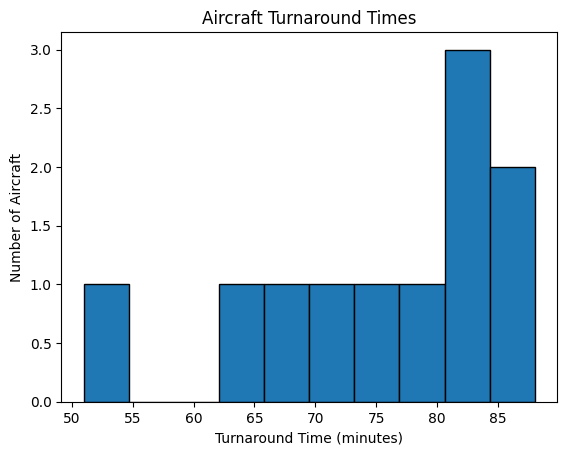

In [191]:
#Visualize the turnaround times
if turnaround_times_with_gates:
    plt.hist(turnaround_times_with_gates, bins = 10, edgecolor = 'black')
    plt.title('Aircraft Turnaround Times')
    plt.xlabel('Turnaround Time (minutes)')
    plt.ylabel('Number of Aircraft')
    plt.show()
else:
    print("No information to display.")